텐서플로우2 에서 logistic_regression 이용하기

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
print(tf.__version__)

2.4.1


구글 코랩 마운트
실행시키면 구글계정 연동되어 인증해야함!

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/')

ModuleNotFoundError: No module named 'google.colab'

마운트된 구글드라이브에서 디렉토리 연결시키기

In [4]:
import os

working_dir = 'dataset'
# 특정 디렉토리
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks'
original_dir = os.getcwd()

try:
  os.chdir(colab_default_dir)       # 구글드라이브의 코랩 기본 디렉토리로 이동

  if not os.path.exists(working_dir):
    os.mkdir(working_dir)
  
  os.chdir(working_dir)
  print('현재 디렉토리: ', os.getcwd())

except Exception as err:
  os.chdir(original_dir)
  print(str(err))

현재 디렉토리:  /content/gdrive/My Drive/Colab Notebooks/dataset


데이터 만들기

In [6]:
try:
  loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')
  x_data = loaded_data[ :, 0: -1]
  t_data = loaded_data[ :, [-1]]

  print("x 형태: ", x_data.shape)
  print('t 형태: ', t_data.shape)

except Exception as err:
  print(str(err))

x 형태:  (759, 8)
t 형태:  (759, 1)


모델 구축

이 때 activation = 'sigmoid'

왜냐하면 logistic regression이여서

In [8]:
model = Sequential()
model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1], ), activation='sigmoid'))

모델 컴파일하기

손실률을 binary_crossentropy로 계산

In [11]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 오버피팅 확인을 위한 validation_split = 0.2 지정
# 이걸로 훈련 데이터로 부터 20프로 비율로 발리데이션 데이터 생성해서 오버피팅 확인가능
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
19/19 - 1s - loss: 0.6904 - accuracy: 0.5321 - val_loss: 0.6892 - val_accuracy: 0.5789
Epoch 2/500
19/19 - 0s - loss: 0.6791 - accuracy: 0.5865 - val_loss: 0.6796 - val_accuracy: 0.5987
Epoch 3/500
19/19 - 0s - loss: 0.6697 - accuracy: 0.6046 - val_loss: 0.6716 - val_accuracy: 0.5987
Epoch 4/500
19/19 - 0s - loss: 0.6617 - accuracy: 0.6211 - val_loss: 0.6649 - val_accuracy: 0.6316
Epoch 5/500
19/19 - 0s - loss: 0.6550 - accuracy: 0.6474 - val_loss: 0.6593 - val_accuracy: 0.6316
Epoch 6/500
19/19 - 0s - loss: 0.6493 - accuracy: 0.6540 - val_loss: 0.6545 - val_accuracy: 0.6316
Epoch 7/500
19/19 - 0s - loss: 0.6443 - accuracy: 0.6590 - val_loss: 0.6502 - val_accuracy: 0.6316
Epoch 8/500
19/19 - 0s - loss: 0.6399 - accuracy: 0.6590 - val_loss: 0.6466 - val_accuracy: 0.6382
Epoch 9/500
19/19 - 0s - loss: 0.6362 - accuracy: 0.6639 - val_loss: 0.6435 - val_accuracy: 0.6316
Epoch 10/500
19/19 - 0s - loss: 0.6328 - accuracy: 0.6672 - val_loss: 0.6406 - val_accuracy: 0.6382
Epoch 11/

In [13]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 913us/step - loss: 0.4811 - accuracy: 0.7681


[0.4810693860054016, 0.7681159377098083]

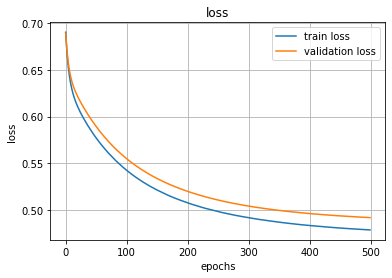

In [14]:
import matplotlib.pyplot as plt

plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label= 'validation loss')
plt.legend(loc='best')
plt.show()

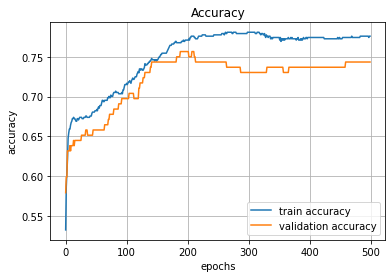

In [16]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label= 'validation accuracy')
plt.legend(loc='best')
plt.show()

# 200번때 이후부터 벌어지는 것으로 오버피팅 보임